# 1. under sampling
## 1.1 PLIM_unique_cross_target
- split into train/valid/test(8/1/1)

In [6]:
import pandas as pd
import numpy as np

In [3]:
wrkdir = '/pubhome/xli02/project/PLIM'
uniq_cross_target = f'{wrkdir}/v2019_dataset/index/PLIM_dataset_v1_final_unique_cross_target_modified.csv'

In [5]:
uniq_cross = pd.read_csv(uniq_cross_target, sep = "\t")
uniq_cross.head()

,unique_identify,-logAffi
0,CHEMBL260_3gcp_CHEMBL10,8.387216
1,CHEMBL268_1snk_CHEMBL100095,6.216811
2,CHEMBL4904_4qlq_CHEMBL100097,4.823909
3,CHEMBL280_1fls_CHEMBL100134,8.154902
4,CHEMBL206_5t97_CHEMBL100231,8.283997


In [27]:
len(uniq_cross)

66938

In [8]:
index = np.random.permutation(len(uniq_cross))
train_ratio=0.8
valid_ratio=0.1
test_ratio=0.1
train_idx = index[:int(len(uniq_cross)*train_ratio)]
valid_idx = index[int(len(uniq_cross)*train_ratio):int(len(uniq_cross)*(train_ratio+valid_ratio))]
test_idx = index[int(len(uniq_cross)*(train_ratio+valid_ratio)):]
# sort by affinity within subset
test_df, valid_df, train_df = uniq_cross.iloc[test_idx].sort_values(by=['-logAffi']), uniq_cross.iloc[valid_idx].sort_values(by=['-logAffi']), uniq_cross.iloc[train_idx].sort_values(by=['-logAffi'])

In [9]:
# test_df.head()

,unique_identify,-logAffi
20165,CHEMBL1827_2h42_CHEMBL245595,0.690000
12221,CHEMBL205_6bc9_CHEMBL205458,0.778100
16055,CHEMBL335_2cma_CHEMBL2297006,1.000000
19490,CHEMBL2360_4rac_CHEMBL2420976,1.136677
15764,CHEMBL4630_2xf0_CHEMBL2235320,1.660000


In [10]:
# len(test_df)

6694

In [14]:
uniq_cross_test = f'{wrkdir}/deep_learning/FAST/fast_plim/under_sample/PLIM_unique_cross_target/test.csv'
test_df.to_csv(uniq_cross_test, sep = "\t", index = False)

In [15]:
uniq_cross_valid = f'{wrkdir}/deep_learning/FAST/fast_plim/under_sample/PLIM_unique_cross_target/valid.csv'
valid_df.to_csv(uniq_cross_valid, sep = "\t", index = False)

In [16]:
uniq_cross_train = f'{wrkdir}/deep_learning/FAST/fast_plim/under_sample/PLIM_unique_cross_target/train.csv'
train_df.to_csv(uniq_cross_train, sep = "\t", index = False)

In [29]:
valid_num = len(valid_idx)
valid_num

6694

In [28]:
train_num = len(train_idx)
train_num

53550

## 1.2 PLIM_unique_within_target

In [48]:
uniq_within_target = f'{wrkdir}/v2019_dataset/index/PLIM_dataset_v1_final_unique_modified.csv'
uniq_within = pd.read_csv(uniq_within_target, sep = "\t")
uniq_within.head()

,unique_identify,-logAffi
0,CHEMBL1075026_1swr_CHEMBL857,14.000000
1,CHEMBL1075027_1jak_CHEMBL253537,4.677781
2,CHEMBL1075027_1hp5_CHEMBL257158,4.698970
3,CHEMBL1075027_1hp5_CHEMBL403756,4.000000
4,CHEMBL1075027_1hp5_CHEMBL404356,3.698970


In [49]:
len(uniq_within)

71060

In [54]:
test_patt_list = list(test_df['unique_identify'])
for row in uniq_within.itertuples():
    if row.unique_identify in test_patt_list:
        uniq_within = uniq_within.drop(row.Index)


In [55]:
len(uniq_within)

64366

In [56]:
index = np.random.permutation(len(uniq_within))
train_num = len(train_idx)
valid_num = len(valid_idx)
train_idx_1 = index[:train_num]
valid_idx_1 = index[train_num:train_num + valid_num]

# sort by affinity within subset
valid_df_1, train_df_1 = uniq_within.iloc[valid_idx_1].sort_values(by=['-logAffi']), uniq_within.iloc[train_idx_1].sort_values(by=['-logAffi'])

In [57]:
len(valid_df_1)

6694

In [58]:
len(train_df_1)

53550

In [59]:
valid_df_1.head()

,unique_identify,-logAffi
57636,CHEMBL4630_2xf0_CHEMBL1236804,0.1800
43437,CHEMBL3589_4o1l_CHEMBL608326,0.2700
43442,CHEMBL3589_2i6a_CHEMBL611270,0.5100
58028,CHEMBL4630_2xey_CHEMBL2235323,0.7000
10806,CHEMBL205_2pov_CHEMBL381906,0.9543


In [60]:
uniq_within_valid = f'{wrkdir}/deep_learning/FAST/fast_plim/under_sample/PLIM_unique_within_target/valid.csv'
valid_df_1.to_csv(uniq_within_valid, sep = "\t", index = False)

In [61]:
uniq_within_train = f'{wrkdir}/deep_learning/FAST/fast_plim/under_sample/PLIM_unique_within_target/train.csv'
train_df_1.to_csv(uniq_within_train, sep = "\t", index = False)

## 1.3 PLIM_unique_cross_target

In [62]:
all_file = f'{wrkdir}/v2019_dataset/index/PLIM_dataset_v1_final_modified.csv'
all_df = pd.read_csv(all_file, sep = "\t")
all_df.head()

,unique_identify,-logAffi
0,CHEMBL2093869_3nif_CHEMBL1234739,5.017729
1,CHEMBL2093869_4z7q_CHEMBL2370659,5.385103
2,CHEMBL2093869_4z7q_CHEMBL130189,5.504456
3,CHEMBL2093869_4z7q_CHEMBL85578,5.974694
4,CHEMBL2093869_4z7q_CHEMBL309709,6.200659


In [63]:
len(all_df)

162337

In [64]:
# test_patt_list = list(test_df['unique_identify'])
for row in all_df.itertuples():
    if row.unique_identify in test_patt_list:
        all_df = all_df.drop(row.Index)


In [65]:
len(all_df)

155643

In [69]:
index = np.random.permutation(len(all_df))
# train_num = len(train_idx)
# valid_num = len(valid_idx)
train_idx_2 = index[:train_num]
valid_idx_2 = index[train_num:train_num + valid_num]

# sort by affinity within subset
valid_df_2, train_df_2 = all_df.iloc[valid_idx_2].sort_values(by=['-logAffi']), all_df.iloc[train_idx_2].sort_values(by=['-logAffi'])

In [70]:
len(valid_df_2)

6694

In [71]:
len(train_df_2)

53550

In [72]:
all_valid = f'{wrkdir}/deep_learning/FAST/fast_plim/under_sample/PLIM_all/valid.csv'
valid_df_2.to_csv(all_valid, sep = "\t", index = False)

In [73]:
all_train = f'{wrkdir}/deep_learning/FAST/fast_plim/under_sample/PLIM_all/train.csv'
train_df_2.to_csv(all_train, sep = "\t", index = False)

# 2. generate random conformation by rdkit

In [91]:
from rdkit import Chem
from rdkit.Chem import AllChem
from pathlib import Path
import py3Dmol


In [74]:
wrkdir

'/pubhome/xli02/project/PLIM'

In [75]:
uniq_cross_target

'/pubhome/xli02/project/PLIM/v2019_dataset/index/PLIM_dataset_v1_final_unique_cross_target_modified.csv'

In [76]:
uniq_cross = pd.read_csv(uniq_cross_target, sep = "\t")
uniq_cross.head()

,unique_identify,-logAffi
0,CHEMBL260_3gcp_CHEMBL10,8.387216
1,CHEMBL268_1snk_CHEMBL100095,6.216811
2,CHEMBL4904_4qlq_CHEMBL100097,4.823909
3,CHEMBL280_1fls_CHEMBL100134,8.154902
4,CHEMBL206_5t97_CHEMBL100231,8.283997


In [77]:
len(uniq_cross)

66938

In [83]:
# uniq_cross['unique_identify'][0].split('_')[0]

'CHEMBL260'

In [85]:
compnd_mols = []
sdf_mol_none = []
for row in uniq_cross.itertuples():
    target = row.unique_identify.split('_')[0]
    pdbid = row.unique_identify.split('_')[1]
    compnd = row.unique_identify.split('_')[2]
    compnd_dir = f'{wrkdir}/v2019_dataset/web_client_{target}/{target}_{pdbid}/{compnd}'
    compnd_sdf = f'{compnd_dir}/compound.sdf'
    if not Path(compnd_sdf).exists():
        continue
    compnd_mol = Chem.SDMolSupplier(compnd_sdf)[0]
    if compnd_mol is None:
        sdf_mol_none.append(row.unique_identify)
        continue
    compnd_mol.SetProp('_Name', row.unique_identify)
    compnd_mols.append(compnd_mol)

In [86]:
len(compnd_mols)

66930

In [87]:
len(sdf_mol_none)

0

In [89]:
# compnd_mols[0].GetProp('_Name')

'CHEMBL260_3gcp_CHEMBL10'

In [92]:
# p = py3Dmol.view(width=400, height=400)
# for m in [compnd_mols[0]]:
#     mb = Chem.MolToMolBlock(m)
#     p.addModel(mb, 'sdf')
# p.setStyle({'stick':{}})
# # p.setBackgroundColor('0xeeeeee')
# p.zoomTo()
# p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [93]:
# m = Chem.Mol(compnd_mols[0])
# m = Chem.AddHs(m)
# AllChem.EmbedMolecule(m)

0

In [94]:
# p = py3Dmol.view(width=400, height=400)
# for m in [m]:
#     mb = Chem.MolToMolBlock(m)
#     p.addModel(mb, 'sdf')
# p.setStyle({'stick':{}})
# # p.setBackgroundColor('0xeeeeee')
# p.zoomTo()
# p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [95]:
# m.GetProp('_Name')

'CHEMBL260_3gcp_CHEMBL10'

In [100]:
len(embed_mols)

66903

In [101]:
len(failed_mols)

27

In [103]:
len(compnd_mols)

66930

In [205]:
failed_embed_mols = []
failed_minimize_mols = []
success_mols = []
mols_none = []
for mol in compnd_mols:
    m = Chem.Mol(mol)
    m = Chem.AddHs(m)
    for _ in range(30):
        code = AllChem.EmbedMolecule(m)
        if code == 0:
            break
    if code != 0:
        failed_embed_mols.append(mol)
        continue
    code_1 = AllChem.UFFOptimizeMolecule(m, maxIters = 1000)
    if code_1 != 0:
        failed_minimize_mols.append(mol)
        continue
    if m is None:
        mols_none.append(mol)
        continue
    success_mols.append(m)
    

RDKit ERROR: [17:07:04] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:04] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:04] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:04] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:04] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:04] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:04] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:04] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:04] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:04] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:05] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:05] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:05] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:05] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [17:07:05] UFFTYPER: Unrecognized a

In [206]:
len(success_mols)

66865

In [207]:
len(failed_embed_mols)

5

In [208]:
len(failed_minimize_mols)

60

In [209]:
len(mols_none)

0

In [222]:
# m = Chem.Mol(failed_embed_mols[0])
# m = Chem.AddHs(m)
# AllChem.EmbedMolecule(m)

0

In [228]:
# success_mols = success_mols_bak
# failed_minimize_mols = failed_minimize_mols_bak
failed_embed_still_2 = []
for mol in failed_embed_still:
    m = Chem.Mol(mol)
    m = Chem.AddHs(m)
    for _ in range(30):
        code = AllChem.EmbedMolecule(m)
        if code == 0:
            break
    if code != 0:
        failed_embed_still_2.append(mol)
        continue
    code_1 = AllChem.UFFOptimizeMolecule(m, maxIters = 1000)
    if code_1 != 0:
        failed_minimize_mols.append(mol)
        continue
    if m is None:
        mols_none.append(mol)
        continue
    success_mols.append(m)


In [229]:
len(success_mols)

66870

In [231]:
len(failed_embed_still_2)

0

In [232]:
len(failed_minimize_mols)

60

In [233]:
# success_mols_bak = success_mols
# failed_minimize_mols_bak = failed_minimize_mols
# print(len(success_mols_bak), len(failed_minimize_mols_bak))
#bak会跟着最初的list变化？
import copy
success_mols_bak = copy.deepcopy(success_mols)
failed_minimize_mols_bak = copy.deepcopy(failed_minimize_mols)
print(len(success_mols_bak), len(failed_minimize_mols_bak))

66870 60


In [235]:
# m = Chem.Mol(failed_minimize_mols[0])
# m = Chem.AddHs(m)
# code = AllChem.EmbedMolecule(m)
# print(code)
# AllChem.UFFOptimizeMolecule(m, maxIters = 1000)

0


0

In [236]:
failed_mini_embed = []
failed_mini_still = []
for mol in failed_minimize_mols:
    m = Chem.Mol(mol)
    m = Chem.AddHs(m)
    for _ in range(50):
        code = AllChem.EmbedMolecule(m)
        if code == 0:
            break
    if code != 0:
        failed_mini_embed.append(mol)
        continue
    code_1 = AllChem.UFFOptimizeMolecule(m, maxIters = 1000)
    if code_1 != 0:
        failed_mini_still.append(m)
        continue
    if m is None:
        mols_none.append(mol)
        continue
    success_mols.append(m)

In [237]:
len(success_mols)

66926

In [238]:
len(failed_mini_embed)

0

In [239]:
len(failed_mini_still)

4

In [240]:
failed_mini_still_2 = []
for mol in failed_mini_still:
    m = Chem.Mol(mol)
    for _ in range(10):
        code_1 = AllChem.UFFOptimizeMolecule(m, maxIters = 1000)
        if code_1 == 0:
            break
    if code_1 != 0:
        failed_mini_still_2.append(m)
        continue
    if m is None:
        mols_none.append(mol)
        continue
    success_mols.append(m)

In [241]:
len(success_mols)

66930

In [242]:
len(failed_mini_still_2)

0

In [245]:
# random_conf_file = '/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/random_conformation/PLIM_unique_cross_target.sdf'
# w1 = Chem.SDWriter(random_conf_file)
# for m in success_mols:
#     w1.write(m)
# w1.close()

In [2]:
success_mols[1].GetProp('_Name')

In [3]:
random_conf_dir = '/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/random_conformation/PLIM_unique_cross_target'
for mol in success_mols:
    random_conf_file = f'{random_conf_dir}/{mol.GetProp("_Name")}.sdf'
    w1 = Chem.SDWriter(random_conf_file)
    w1.write(mol)
    w1.close()

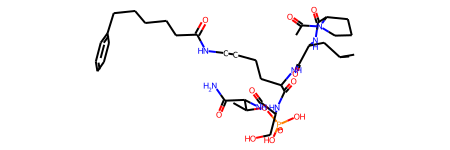

In [198]:
# failed_still[0]

In [197]:
# mol = Chem.Mol(failed_still[0])
# mol = Chem.AddHs(mol)
# AllChem.EmbedMolecule(mol)

0

In [148]:
# for mol in compnd_mols[2551:2552]:
#     m = Chem.Mol(mol)
#     m = Chem.AddHs(m)
#     code = AllChem.EmbedMolecule(m)
#     if code != 0:
#         continue
#     code_1 = AllChem.UFFOptimizeMolecule(m)
#     print(mol.GetProp('_Name'))

CHEMBL4630_2ayp_CHEMBL1223040


RDKit ERROR: [10:42:26] UFFTYPER: Unrecognized atom type: Se2+2 (0)
RDKit ERROR: [10:42:26] UFFTYPER: Unrecognized atom type: Se2+2 (0)


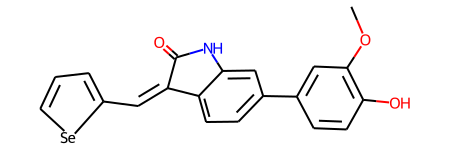

In [144]:
# compnd_mols[2551]

In [149]:
# code_1

0

In [152]:
# p = py3Dmol.view(width=400, height=400)
# for m in [mol]:
#     mb = Chem.MolToMolBlock(m)
#     p.addModel(mb, 'sdf')
# p.setStyle({'stick':{}})
# # p.setBackgroundColor('0xeeeeee')
# p.zoomTo()
# p.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [4]:
# log_file = '/pubhome/xli02/project/PLIM/deep_learning/FAST/fast_plim/2-train/complex/complex_6A/shuffle_true/log/PLIM_unique_within_target_complex_shuffle_true_pock_6A_epoch_300.log'
# with open(log_file, 'r') as f:
#     lines = f.readlines()

In [5]:
# R2=[]
# for line in lines:
#     if 'Performance on validate set' in line:
#         R2.append(float(line.split('\t')[2].split(':')[1]))

In [8]:
# R2[1]

0.19772762387835874

In [7]:
# len(R2)

150

In [9]:
# max(R2)

0.6151803006345422